<a href="https://colab.research.google.com/github/ericyoc/monte_carlo_sim_cyber_kill_chain_poc/blob/main/monte_carlo_sim_cyber_kill_chain_poc.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import random
import matplotlib.pyplot as plt
import numpy as np
from prettytable import PrettyTable

In [12]:
def simulate_attack():
    stages = [
        ("Reconnaissance", 0.8, 0.6),
        ("Weaponization", 0.7, 0.5),
        ("Delivery", 0.6, 0.7),
        ("Exploitation", 0.5, 0.8),
        ("Installation", 0.9, 0.4),
        ("Command & Control", 0.8, 0.6),
        ("Actions On Objective", 0.7, 0.5)
    ]

    eve_success = 1.0
    alice_detection = 1.0

    for stage, eve_prob, alice_prob in stages:
        eve_success *= eve_prob
        alice_detection *= (1 - alice_prob)

    return eve_success, alice_detection

In [13]:
def run_monte_carlo(num_simulations):
    eve_successes = []
    alice_detections = []

    for _ in range(num_simulations):
        eve_success, alice_detection = simulate_attack()
        eve_successes.append(eve_success)
        alice_detections.append(alice_detection)

    return eve_successes, alice_detections

In [14]:
def main():
    num_simulations = 10000
    eve_successes, alice_detections = run_monte_carlo(num_simulations)

    eve_success_prob = np.mean(eve_successes)
    alice_detection_prob = 1 - np.mean(alice_detections)

    print(f"Monte Carlo simulation results (n={num_simulations}):")
    print(f"Probability of Eve successfully completing the attack: {eve_success_prob:.3%}")
    print(f"Probability of Alice detecting and stopping the attack at any stage: {alice_detection_prob:.3%}")

    table = PrettyTable()
    table.field_names = ["Stage", "Eve's Success Prob.", "Alice's Detection Prob."]
    table.align["Stage"] = "l"
    table.align["Eve's Success Prob."] = "c"
    table.align["Alice's Detection Prob."] = "c"

    table.add_row(["Reconnaissance", "0.8", "0.6"])
    table.add_row(["Weaponization", "0.7", "0.5"])
    table.add_row(["Delivery", "0.6", "0.7"])
    table.add_row(["Exploitation", "0.5", "0.8"])
    table.add_row(["Installation", "0.9", "0.4"])
    table.add_row(["Command & Control", "0.8", "0.6"])
    table.add_row(["Actions On Objective", "0.7", "0.5"])
    table.add_row(["Overall Probability (Simulation)", f"{eve_success_prob:.3%}", f"{alice_detection_prob:.3%}"])
    table.add_row(["Overall Probability (Theoretical)", "12.7%", "99.6%"])

    print("\nAttack Scenario Table:")
    print(table)

    plt.figure(figsize=(8, 6))
    simulations = range(1, num_simulations + 1)
    plt.plot(simulations, np.cumsum(eve_successes) / np.arange(1, num_simulations + 1), label="Eve's Success")
    plt.plot(simulations, 1 - np.cumsum(alice_detections) / np.arange(1, num_simulations + 1), label="Alice's Detection")
    plt.xlabel("Simulation Number")
    plt.ylabel("Cumulative Probability")
    plt.title("Monte Carlo Simulation Results")
    plt.legend()
    plt.grid(True)

    plt.tight_layout()
    plt.show()

Monte Carlo simulation results (n=10000):
Probability of Eve successfully completing the attack: 8.467%
Probability of Alice detecting and stopping the attack at any stage: 99.856%

Attack Scenario Table:
+-----------------------------------+---------------------+-------------------------+
| Stage                             | Eve's Success Prob. | Alice's Detection Prob. |
+-----------------------------------+---------------------+-------------------------+
| Reconnaissance                    |         0.8         |           0.6           |
| Weaponization                     |         0.7         |           0.5           |
| Delivery                          |         0.6         |           0.7           |
| Exploitation                      |         0.5         |           0.8           |
| Installation                      |         0.9         |           0.4           |
| Command & Control                 |         0.8         |           0.6           |
| Actions On Objectiv

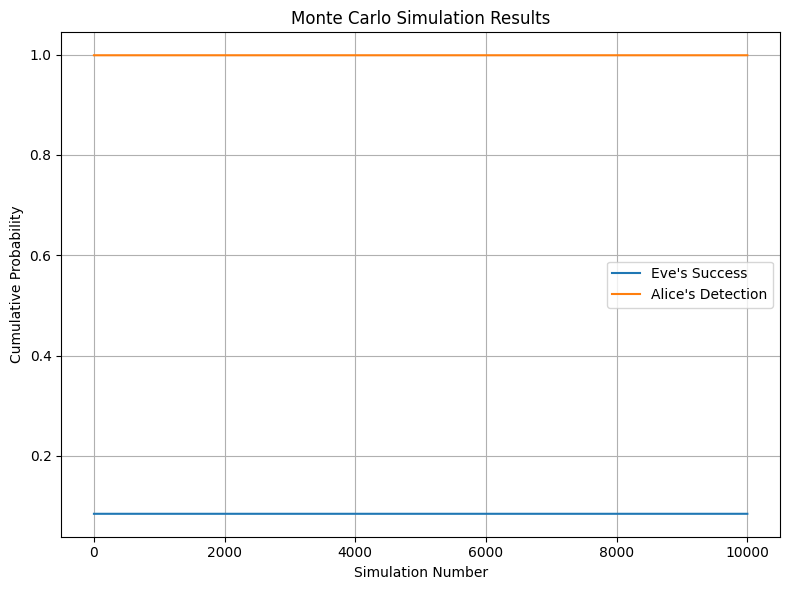

In [15]:
if __name__ == '__main__':
    main()